<a href="https://colab.research.google.com/github/Sarvatha07/Sarvatha07/blob/main/Sarvatha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)

print("✔ Libraries Imported!")

✔ Libraries Imported!


In [ ]:
df = pd.read_csv("Phishing_Legitimate_full.csv")

print("✔ Dataset Loaded Successfully!")
print(df.head())

✔ Dataset Loaded Successfully!
   id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0   1        3               1          5         72        0   
1   2        3               1          3        144        0   
2   3        3               1          2         58        0   
3   4        3               1          6         79        1   
4   5        3               0          4         46        0   

   NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  ...  \
0                  0         0            0              0  ...   
1                  0         0            0              2  ...   
2                  0         0            0              0  ...   
3                  0         0            0              0  ...   
4                  0         0            0              0  ...   

   IframeOrFrame  MissingTitle  ImagesOnlyInForm  SubdomainLevelRT  \
0              0             0                 1                 1   
1              0             0     

In [ ]:
X = df.drop("CLASS_LABEL", axis=1) # Features excluding the target
y = df["CLASS_LABEL"]              # Target variable

numeric_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

print("✔ Features (X) and Target (y) Defined!")

✔ Features (X) and Target (y) Defined!


In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

print("✔ Preprocessing Pipeline Defined!")

✔ Preprocessing Pipeline Defined!


In [ ]:
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])

print("✔ Model Pipeline Defined!")

✔ Model Pipeline Defined!


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✔ Data Split Successfully!")

✔ Data Split Successfully!


In [ ]:
model.fit(X_train, y_train)
print("\n✔ Model Training Completed!")


✔ Model Training Completed!


In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\n============= MODEL PERFORMANCE ============")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision : {precision_score(y_test, y_pred):.4f}")
print(f"Recall    : {recall_score(y_test, y_pred):.4f}")
print(f"ROC-AUC   : {roc_auc_score(y_test, y_prob):.4f}")
print("==============================================\n")


============= MODEL PERFORMANCE ============
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
ROC-AUC   : 1.0000



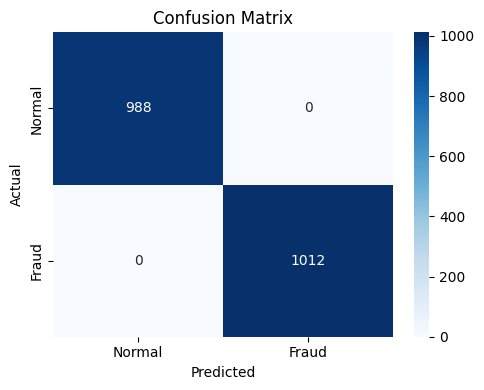

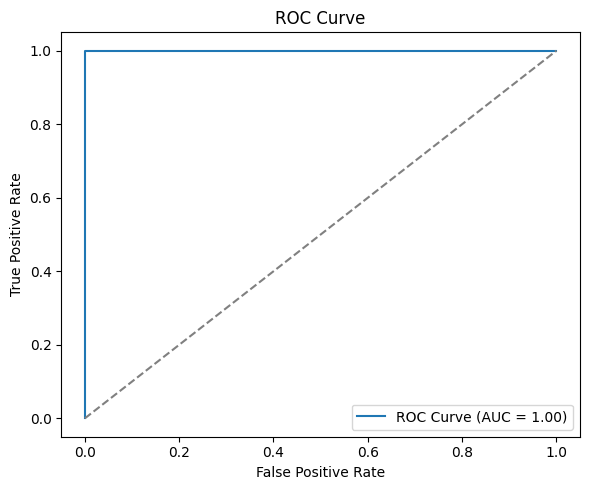

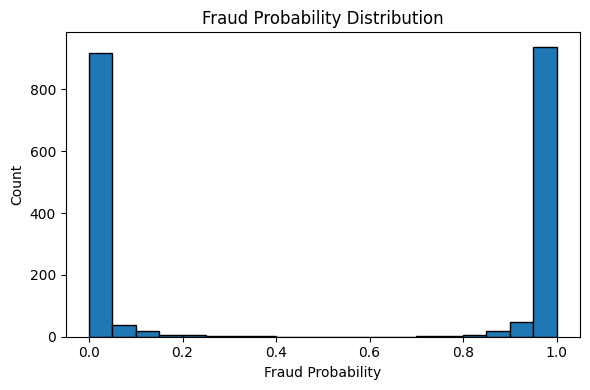


=== SAMPLE PREDICTION ===
Predicted CLASS_LABEL : 0
CLASS_LABEL Probability: 0.0


In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Fraud"],
            yticklabels=["Normal", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.hist(y_prob, bins=20, edgecolor="black")
plt.title("Fraud Probability Distribution")
plt.xlabel("Fraud Probability")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Create a sample DataFrame with the correct column structure for prediction
# Using the first row of X_test as an example
sample = X_test.iloc[0:1].copy() # .copy() to avoid SettingWithCopyWarning

pred = model.predict(sample)[0]
prob = model.predict_proba(sample)[0][1]

print("\n=== SAMPLE PREDICTION ===")
print("Predicted CLASS_LABEL :", pred)
print("CLASS_LABEL Probability:", prob)